# Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing path

In [3]:
path = r'/Users/heatherstewart/Dropbox/Mac/Desktop/Instacart Basket analysis 3'

# Calling path

In [4]:
path

'/Users/heatherstewart/Dropbox/Mac/Desktop/Instacart Basket analysis 3'

## Importing dataframe 

In [7]:
df_combo_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_combo_final.pkl'))

##Viewing dataframe head, ensuring that it is the correct dataframe. 

In [8]:
df_combo_all.head()

,customer_id,first_name,sirname,gender,state,customer_age,date_joined,n_dependants,fam_status,income,...,prices,_merge,price_range_loc,Busiest days,max_order,loyalty_flag,average_price,spending_flag,regularity,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,both,Mid_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,both,Low_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,9.0,both,Mid_range product,Busiest days,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer


In [9]:
#Dropping the gender and sirname columns in consideration of data privacy.

df3=df_combo_all.drop(columns =['gender','sirname'])
df3.head()

,customer_id,first_name,state,customer_age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,prices,_merge,price_range_loc,Busiest days,max_order,loyalty_flag,average_price,spending_flag,regularity,order_frequency_flag
0,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,9.0,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer
1,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,12.6,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer
2,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,12.6,both,Mid_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer
3,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,4.3,both,Low_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer
4,33890,Patricia,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,9.0,both,Mid_range product,Busiest days,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer


## Step 2: When reviewning the dataframe there are PIIs to be considered, such as customer 'first name' , 'last name', 'gender'.

## Step 3: Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of data.  

 # Create a "Region" column from customers data set. 
 # Determine whether there's a difference in spending habits between the different U.S. regions. 


In [10]:
# Step 3
#Creating a list of Region

region1 = ['Maine','New Hampshire','Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
region2 = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region3 = ['Delaware','Maryland','District of Columbia','Virgina','West Virgina','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma', 'Texas', 'Arkansas', 'Louisiana','Puerto Rico']
region4 =['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon','California','Hawaii']

In [11]:
df3.loc[df_combo_all['state'].isin(region1),'region']='Region1'

df3.loc[df_combo_all['state'].isin(region2),'region']='Region2'

df3.loc[df_combo_all['state'].isin(region3),'region']='Region3'

df3.loc[df_combo_all['state'].isin(region4),'region']='Region4'

In [12]:
df3.head()

,customer_id,first_name,state,customer_age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,_merge,price_range_loc,Busiest days,max_order,loyalty_flag,average_price,spending_flag,regularity,order_frequency_flag,region
0,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2
1,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,both,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2
2,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,both,Mid_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2
3,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,both,Low_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2
4,33890,Patricia,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,both,Mid_range product,Busiest days,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Region4


In [13]:
df3['region'].value_counts(dropna = False)

region
Region3    2863232
Region4    2490122
Region2    2279832
Region1    1717203
NaN         376177
Name: count, dtype: int64

In [14]:
# Addressig "Region" NAN values by using .isnull() code.

df3 = df3[df3['region'].isnull()==False]

In [15]:
# Addressing "product_name" NAN values by using .isnull()code. 

df3 = df3[df3['product_name'].isnull()==False]

In [16]:
df3.isnull().sum()

customer_id               0
first_name                0
state                     0
customer_age              0
date_joined               0
n_dependants              0
fam_status                0
income                    0
order_id                  0
order_number              0
orders_day_of_week        0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
prices                    0
_merge                    0
price_range_loc           0
Busiest days              0
max_order                 0
loyalty_flag              0
average_price             0
spending_flag             0
regularity                0
order_frequency_flag      0
region                    0
dtype: int64

In [17]:
#Step 3A: Using crosstab to determine difference in spending habits between U.S regions and spenders. 

crosstab=pd.crosstab(df3['spending_flag'], df3['region'],dropna=False)

In [18]:
crosstab

region,Region1,Region2,Region3,Region4
spending_flag,,,,
High spender,32553,46920,54303,48037
Low spender,1682993,2231081,2806501,2439907


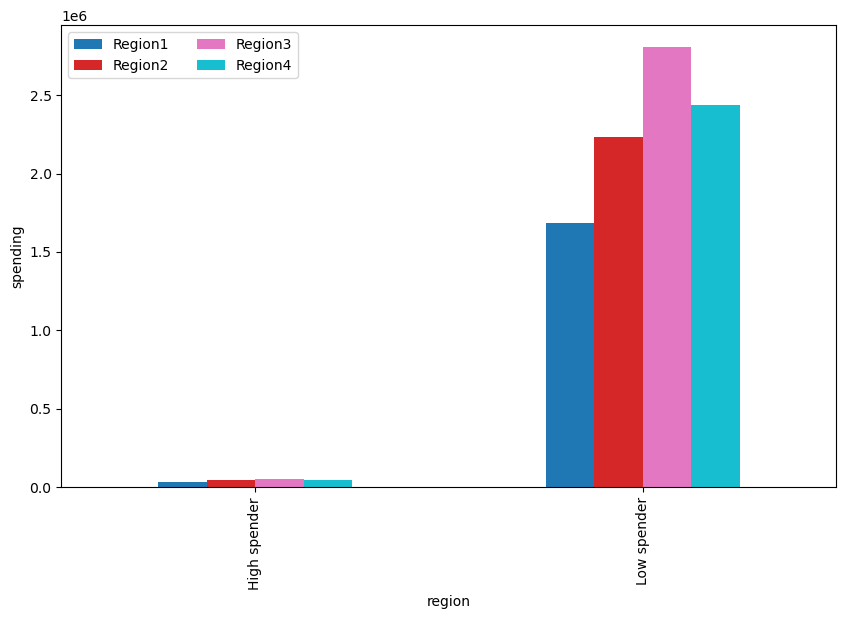

In [19]:
#Creating Bar chart for Spending_flag

#Create a plot chart

bar1=crosstab.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.xlabel('region')
plt.ylabel('spending')
plt.show()

##Answer: Low spenders are have a higher spending habit across regions. 

There is a larger number of "Low spender" compare to "High spender" over all regions. 

Region 3 has the largest volume of lowest spender.

Region 1 has the lowest volume of High spender and low spender.

In [20]:
#Exporting chart

bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender.png'))

# Step 4: Create exclusion flag for low-activity customers (customers with less than 5 orders)

In [21]:
# Creating an "activity"exclusion flag by using 'if statement.' First creating an'activity'flag of 'low_acitvity'and 'high_activity'.

def activity (row):
    
    if row ['regularity']<5:
        return 'low_activity'
    else: return 'high_activity'

In [22]:
#Uisng .apply to create activity rows.

df3['activity_range']= df3.apply(activity, axis = 1)

In [23]:
#activity flag

df3['activity_range'].value_counts(dropna = False)

activity_range
high_activity    8100375
low_activity     1241920
Name: count, dtype: int64

In [24]:
# Viewing dataframe head

df3.head()

,customer_id,first_name,state,customer_age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,price_range_loc,Busiest days,max_order,loyalty_flag,average_price,spending_flag,regularity,order_frequency_flag,region,activity_range
0,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2,high_activity
1,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid_range product,Regularly busy,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2,high_activity
2,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,Mid_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2,high_activity
3,26711,Deborah,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,Low_range product,Busiest days,8,New customer,7.988889,Low spender,20.0,Regular customer,Region2,high_activity
4,33890,Patricia,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Mid_range product,Busiest days,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,Region4,high_activity


In [25]:
df3.shape

(9342295, 31)

In [26]:
# Creating 'low_activity'exclusion flag
    
df3.loc[df_combo_all['max_order']<=5,'exclusion_flag']='Exclusion'

In [27]:
# Create an "exclusion_flag" column with value greater than or equal to 5 condition.

df3.loc[df_combo_all['max_order']>=5,'exclusion_flag']='Keep'

In [28]:
df3['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Keep         8927532
Exclusion     414763
Name: count, dtype: int64

In [29]:
#Assigning row to dataframe

df_exclusion = df3[df3['exclusion_flag']=='Exclusion']

In [30]:
# Dataframe dimension

df_exclusion.shape

(414763, 32)

In [31]:
# Exporting dataframe 

df_exclusion.to_pickle(os.path.join(path,'02 Data','Prepared Data','exclude_below_5.pkl'))

In [32]:
df_exclusion.describe()

,customer_id,customer_age,n_dependants,income,order_id,order_number,orders_day_of_week,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,regularity
count,414763.000000,414763.000000,414763.000000,414763.000000,4.147630e+05,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.000000,414763.00000
mean,103153.743629,49.473697,1.502656,94412.066759,1.720545e+06,2.266116,2.686544,22.550080,25620.981618,8.139335,0.233782,71.377789,9.856523,12.367002,3.522361,12.900947,23.24100
std,59392.427013,18.471230,1.119677,40980.861207,9.860748e+05,1.018548,2.106046,9.805099,14147.212909,6.937154,0.423235,37.983421,6.260625,522.627656,0.499500,134.296482,8.76858
min,5.000000,18.000000,0.000000,25986.000000,5.400000e+01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.00000
25%,51627.000000,33.000000,1.000000,60224.000000,8.685770e+05,1.000000,1.000000,14.000000,13535.000000,3.000000,0.000000,32.000000,4.000000,4.200000,3.000000,7.239130,16.00000
50%,103300.000000,49.000000,2.000000,93569.000000,1.725937e+06,2.000000,2.000000,30.000000,25513.000000,6.000000,0.000000,83.000000,9.000000,7.400000,4.000000,7.814925,30.00000
75%,154422.000000,65.000000,3.000000,124421.000000,2.572822e+06,3.000000,5.000000,30.000000,38108.000000,11.000000,0.000000,107.000000,16.000000,11.300000,4.000000,8.397500,30.00000
max,206205.000000,81.000000,3.000000,550917.000000,3.421071e+06,4.000000,6.000000,30.000000,49688.000000,89.000000,1.000000,134.000000,21.000000,99999.000000,4.000000,25005.425000,30.00000


# Step 5: Create a customer profiling variable based on age, income, certain goods in the "department_id" column, and number of dependents. 

# "orders_day_of_week" and "order_hour_of_day" columns can be used if you think of a way they would impact customer profiles.


Creating flag by looking at percentile of age, income, department_id and number of dependants, 

Age: 25% = 33 yrs old, 50% = 49 and 75% = 65

Income: 25% = 60244, 50% = 93569 and 75% = 124421

department_id: 25% = 4, 50% = 9 and 75% = 16

n_dependants: 25% = 1, 50% = 2, and 75% = 3


In [33]:
#Age flag column base on age below 33

df_exclusion.loc[df_exclusion['customer_age']<33,'age_flag']='Young Adult'

/var/folders/w_/168pfpgj5xj899twxj6s9fsm0000gn/T/ipykernel_26812/1995158297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['customer_age']<33,'age_flag']='Young Adult'


In [34]:
#Age flag column base on age between 33 and 65

df_exclusion.loc[(df_exclusion['customer_age']>=33) & (df_exclusion['customer_age']<65),'age_flag']='Middle aged'

In [35]:
#Age flag column base on age above 65

df_exclusion.loc[df_exclusion['customer_age']>=65,'age_flag']='Senior citizen'

In [36]:
#Using value count to look at 'age_flag'

df_exclusion['age_flag'].value_counts(dropna=False)

age_flag
Middle aged       207554
Senior citizen    109732
Young Adult        97477
Name: count, dtype: int64

##Creating income flag base on income

In [37]:
#Income flag base on income level

df_exclusion.loc[df_exclusion['income']<60244,'income_flag']= 'Low income'

/var/folders/w_/168pfpgj5xj899twxj6s9fsm0000gn/T/ipykernel_26812/3322235039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['income']<60244,'income_flag']= 'Low income'


In [38]:
df_exclusion.loc[(df_exclusion['income']>=60244) & (df_exclusion['income']<93569),'income_flag']= 'Medium income'

In [39]:
df_exclusion.loc[(df_exclusion['income']>=93569) & (df_exclusion['income']<124421),'income_flag']='High income'

In [40]:
df_exclusion.loc[df_exclusion['income']>=124421,'income_flag']='Very high income'

In [41]:
#Using value count to look at 'income_flag'

df_exclusion['income_flag'].value_counts(dropna=False)

income_flag
Low income          103728
Very high income    103696
High income         103693
Medium income       103646
Name: count, dtype: int64

#Creating exclusion number of dependants flag based on n_dependants

In [42]:
df_exclusion.loc[df_exclusion['n_dependants']==0,'dependants_flag']='No dependants'

/var/folders/w_/168pfpgj5xj899twxj6s9fsm0000gn/T/ipykernel_26812/167941247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['n_dependants']==0,'dependants_flag']='No dependants'


In [43]:
df_exclusion.loc[df_exclusion['n_dependants']>0,'dependants_flag']='Have dependants'

In [44]:
df_exclusion['dependants_flag'].value_counts(dropna=False)

dependants_flag
Have dependants    311116
No dependants      103647
Name: count, dtype: int64

In [45]:
#Using value to view orders_day_of_week 

df_exclusion['orders_day_of_week'].value_counts()

orders_day_of_week
0    84732
1    71765
6    59110
2    54494
5    49694
3    49476
4    45492
Name: count, dtype: int64

In [46]:
df_exclusion['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    84732
1    71765
2    54494
3    49476
4    45492
5    49694
6    59110
Name: count, dtype: int64

In [47]:
# creating an orders_day_of_week list

orders_week_flag_data = {'Saturday':84732,'Sunday':71765,'Monday':54494,'Tuesday':49476,'Wednesday':45492,'Thursday':49694,'Friday':59110}
week_category = list(orders_week_flag_data.keys())
week_count=list(orders_week_flag_data.values())
colors=['darkgreen','green','darkblue','lightblue','blue','yellow','brown']

In [48]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

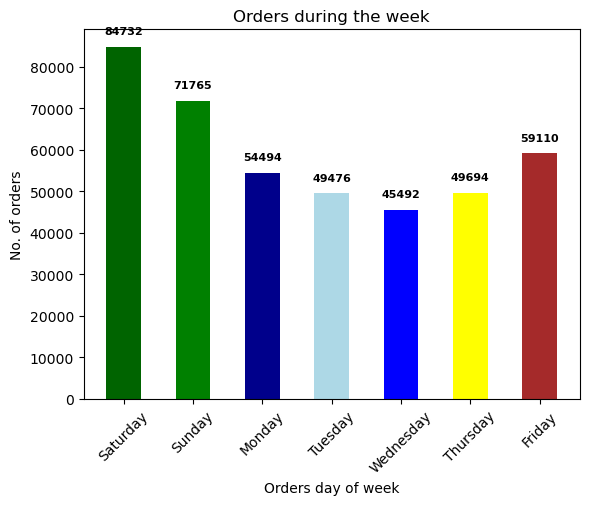

In [49]:
#Create a bar chart
bar_week = plt.bar(week_category,week_count,color = colors,width = 0.5)


# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
#enumerate
for i,v in enumerate(week_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    
# X axis label
plt.xlabel('Orders day of week')

# rotates the x axis labels to 45 degrees
plt.xticks(rotation=45)

# Y axis label
plt.ylabel('No. of orders')

# chart title
plt.title('Orders during the week')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Orders_dow_barplot.png'),bbox_inches='tight')

#plt.show()

In [50]:

crosstab_plot=pd.crosstab(df_exclusion['department_id'], df_exclusion['orders_day_of_week'],normalize='index',dropna = False)
crosstab

region,Region1,Region2,Region3,Region4
spending_flag,,,,
High spender,32553,46920,54303,48037
Low spender,1682993,2231081,2806501,2439907


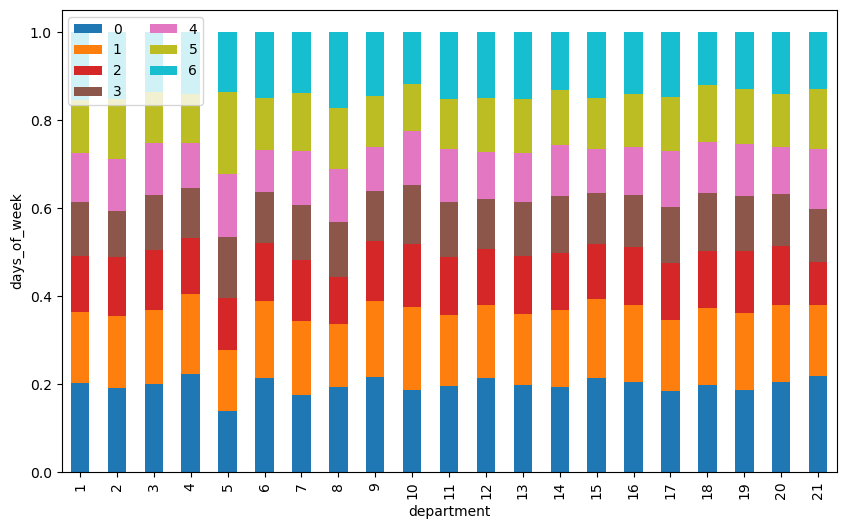

In [51]:
#Create a plot chart

bar2=crosstab_plot.plot(kind='bar',
                   stacked=True,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.xlabel('department')
plt.ylabel('days_of_week')
plt.show()

In [52]:
#Exporting graph

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DOW.png'))

# Importing ords_prods_merge dataframe

In [53]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merge.pkl'))

In [54]:
#Viewing df_ords_prods_merge dataframe head

df_ords_prods_merge.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,30.0,196,1,0,Soda,77,7,9.0,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both


In [55]:
#Using crosstab to view both order_hour_of_day and orders_day_of_week

crosstab3 = pd.crosstab(df_ords_prods_merge['order_hour_of_day'], df_ords_prods_merge['orders_day_of_week'],dropna = False)
crosstab3

orders_day_of_week,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,38866,37120,29917,27526,24718,29519,31276
1,22518,18298,14712,13563,13530,14963,18202
2,12722,10816,8339,8667,7979,9518,11390
3,8850,7113,7026,5777,6330,8323,7898
4,8369,7674,6802,6841,6925,8738,7934
5,11632,14419,12748,11741,12007,14730,10780
6,34986,52773,43810,40949,39837,46282,32133
7,133394,165443,122476,110703,113504,128869,117539
8,306499,333337,224043,198420,194144,224148,239361


# Answering Key questions

##QUESTION 1:The sales team needs to know what is the busiest day of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders. 

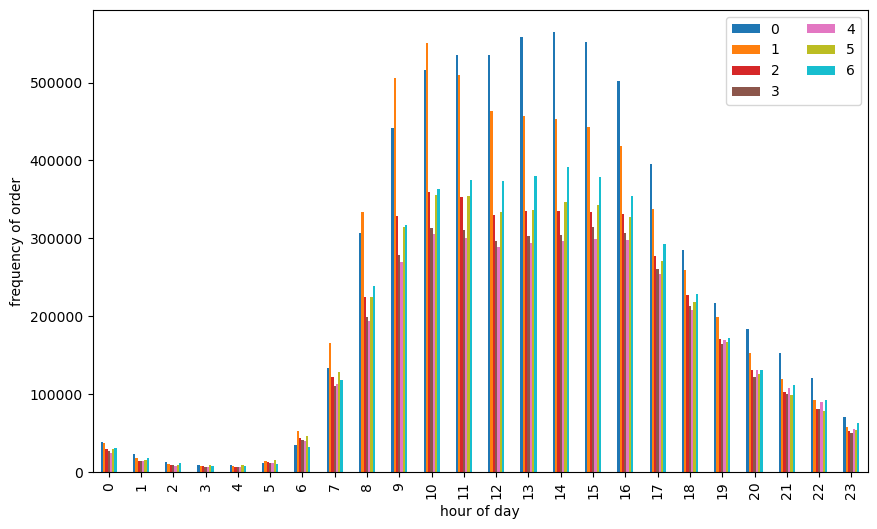

In [64]:
bar3=crosstab3.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('hour of day')
plt.ylabel('frequency of order')
plt.show()

In [65]:
#Exporting chart

bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_OHOD.png'))

##Anwer: The busiest days of the week with the largest volume of orders are 0=Saturdays and 1=Sundays, and the busiest time of day are 9am - 5pm on 0=Saturday, 1=Sunday, and 6=Friday. Therefore, in order to increase sales ads should be scheduled on 2=Monday,3=Tuesday,4=Wednesday and 5=Thursday between the hours of 6pm - 8am. 

##QUESTION 2: The sales team needs to know whether there are particular times of day when people spend the most money, as this might inform the type of products they advertise at these times. 

In [55]:
crosstab4 = pd.crosstab(df_exclusion['department_id'], df_exclusion['income_flag'],dropna = False)
crosstab4

income_flag,High income,Low income,Medium income,Very high income
department_id,,,,
1,8129,8267,8198,8125
2,154,140,128,152
3,3687,3559,3788,3738
4,29764,26083,29896,29655
5,698,739,592,598
6,954,872,1010,989
7,7988,9526,7804,7896
8,375,309,326,345
9,3277,2910,3334,3316


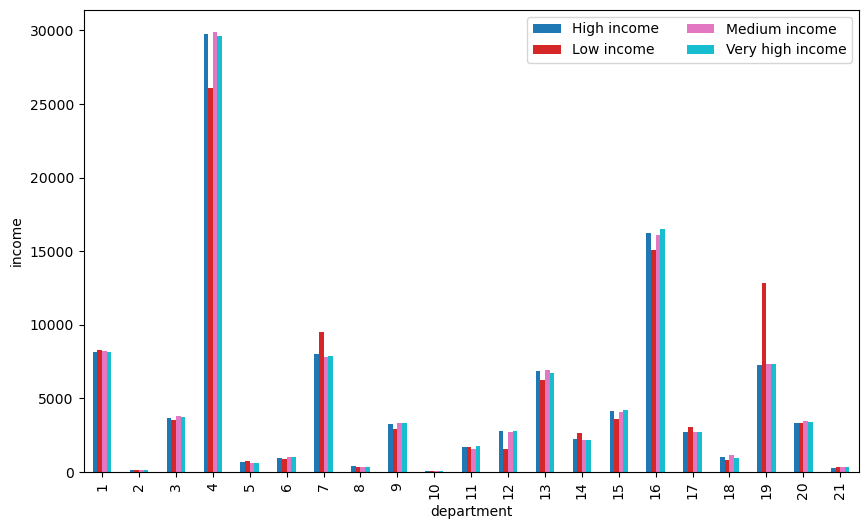

In [56]:
##use a histogram for 

bar4=crosstab4.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('department')
plt.ylabel('income')
plt.show()

##Answer: Income earners across all levels spends the most in department_4 followed by department 16. In department 19 low income earners spends the most. 

In [57]:
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

# Question 3: Instacart has a lot of products with different price tags. Marketing and sales wants to use simpler price range groupings to help direct their efforts.

In [58]:
##Dropping prices greater then $25 from df_exclusion datafram, price column. 
# Using .loc() to cap prices >25 

df4=df_exclusion.loc[df_exclusion['prices']>100]

In [59]:
#Looking at price_range_loc and department_id to assess which department has the largest volume of items priced within price range. 

crosstab5 = pd.crosstab(df_exclusion['department_id'], df_exclusion['price_range_loc'],dropna = False)
crosstab5

price_range_loc,High_range product,Low_range product,Mid_range product
department_id,,,
1,0,9729,22990
2,0,213,361
3,0,3669,11103
4,0,32418,82980
5,0,626,2001
6,0,1058,2767
7,0,11040,22174
8,0,396,959
9,0,4220,8617


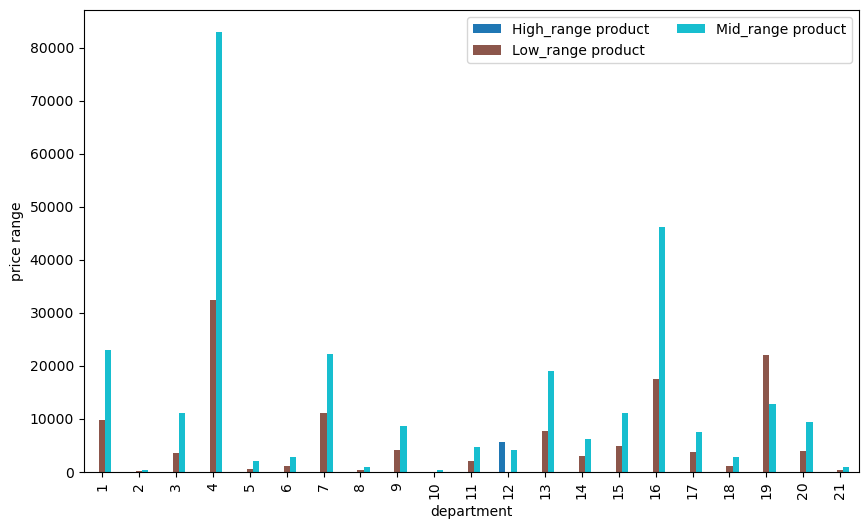

In [60]:
#Plotting department_id on the x-axis and price_range on the y_axis, using bar chart. 

bar5=crosstab5.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('department')
plt.ylabel('price range')
plt.show()

In [61]:
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pricerange.png'))

##### Answer: Mid-range products priced between $5-$15 have the largest volumne of orders, followed by low-range products, priced under $5 has the second largest price range. 

##Department_id 4 has the largest price range, followed by department_id 16. Conversely, high_range product, priced over $15 has the lowest volume throughout the department_id, except for department_id 12, and still the volume of is low compared to other department_id and 

In [62]:
#Using crosstab to view which department has the highest volume of sales. 

crosstab6 = pd.crosstab(df_exclusion['department_id'], df_exclusion['max_order'],dropna = False)
crosstab6

max_order,3,4
department_id,,
1,15780,16939
2,259,315
3,6896,7876
4,55169,60229
5,1263,1364
6,1897,1928
7,15768,17446
8,665,690
9,6134,6703


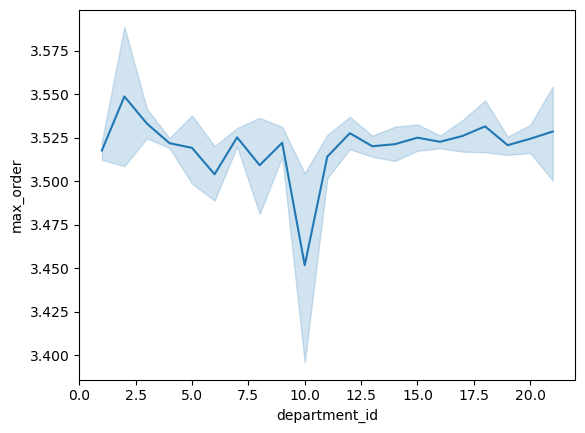

In [63]:
line=sns.lineplot(data=df_exclusion,x='department_id', y='max_order')

#Answer: Department_id 2 has the highest volume of sales whereas department_id 10 has the lowest number of sales. 

In [64]:
#Viewing department_id and product_id to determine which product is most ordered.

crosstab_product=pd.crosstab(df_exclusion['department_id'], df_exclusion['reordered'],dropna = False)
crosstab_product

reordered,0,1
department_id,,
1,25416,7303
2,497,77
3,11024,3748
4,84367,31031
5,1954,673
6,3377,448
7,23389,9825
8,1020,335
9,10754,2083


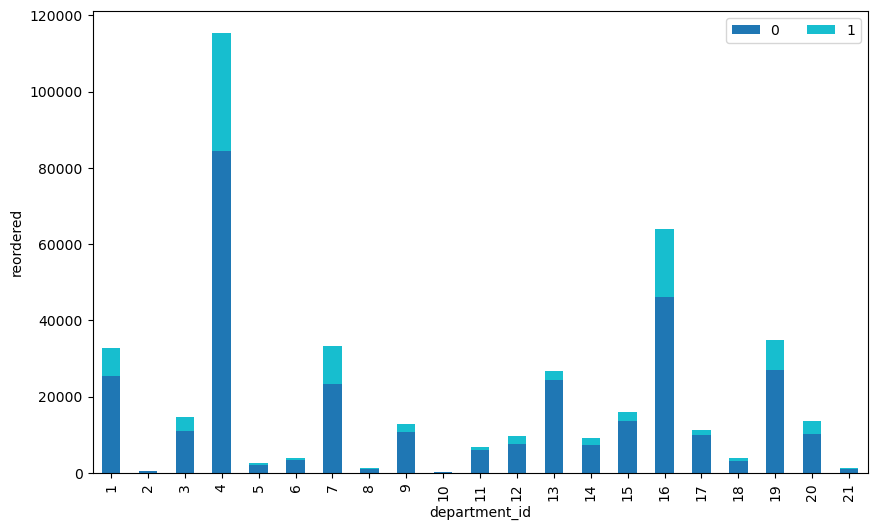

In [65]:
## Using bar to view frequency of department_id and reordered.

barprod=crosstab_product.plot(kind='bar',
                   stacked=True,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('department_id')
plt.ylabel('reordered')
plt.show()

In [66]:
barprod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prod.png'))

##Answer:Department 4 has the highest reordered items,followed by 16,19,17 and 1 respectfully. 

# Step 7:
##Aggregate the max, mean and min variable on a customer level for usage frequency and expenditure

In [67]:
#Addressing prices greater than $25

df_exclusion.loc[df_exclusion['prices']>25]=np.nan

In [68]:
df_exclusion['prices'].max()

25.0

In [69]:
##profiling prices and income to see correaltion between both. 

df_exclusion.groupby('prices').agg({'income_flag': ['max']})

,income_flag
,max
prices,
1.0,Very high income
1.1,Very high income
1.2,Very high income
1.3,Very high income
1.4,Very high income
...,...
24.6,Very high income
24.7,Very high income


In [70]:
df_exclusion.groupby('orders_day_of_week').agg({'prices': ['mean']})

,prices
,mean
orders_day_of_week,
0.0,7.856784
1.0,7.808028
2.0,7.724473
3.0,7.755329
4.0,7.773366
5.0,7.800839
6.0,7.848861


In [71]:
df_exclusion.groupby('regularity').agg({'prices': ['min']})

,prices
,min
regularity,
0.0,1.0
0.5,4.9
1.0,1.0
1.5,1.3
2.0,1.0
...,...
28.0,1.0
28.5,1.0


In [72]:
df_exclusion.groupby('n_dependants').agg({'income_flag': ['max']})
                                                

,income_flag
,max
n_dependants,
0.0,Very high income
1.0,Very high income
2.0,Very high income
3.0,Very high income


In [73]:
df_exclusion.groupby('n_dependants').agg({'income_flag': ['min']})

,income_flag
,min
n_dependants,
0.0,High income
1.0,High income
2.0,High income
3.0,High income


In [74]:
df_exclusion.groupby('n_dependants').agg({'customer_age': ['mean']})

,customer_age
,mean
n_dependants,
0.0,49.969739
1.0,49.383847
2.0,49.461907
3.0,49.082023


In [75]:
##Aggreagation region and income mean

df_exclusion.groupby('region').agg({'income_flag': ['max']})

,income_flag
,max
region,
Region1,Very high income
Region2,Very high income
Region3,Very high income
Region4,Very high income


##Region 1 has the highest average income, therefore has the higher spending power and would spend more on higher priced goods. 

In [76]:
df_exclusion.groupby('n_dependants').agg({'prices': ['mean']})

,prices
,mean
n_dependants,
0.0,7.788194
1.0,7.808447
2.0,7.782644
3.0,7.827934


#As household increases in size, spending power decreases.This would indicate that larger household would benefit more from cheaper price products and would shop on days when prices are lower. 

In [77]:
#Using crosstab to compare price and income

crosstab7=pd.crosstab(df_exclusion['prices'], df_exclusion['income_flag'],dropna = False)
crosstab7

income_flag,High income,Low income,Medium income,Very high income
prices,,,,
1.0,399,549,365,407
1.1,716,1059,654,630
1.2,920,1174,924,897
1.3,1162,1665,1215,1218
1.4,1132,1596,1126,1075
...,...,...,...,...
24.6,9,8,3,9
24.7,20,10,14,20
24.8,1,0,6,3


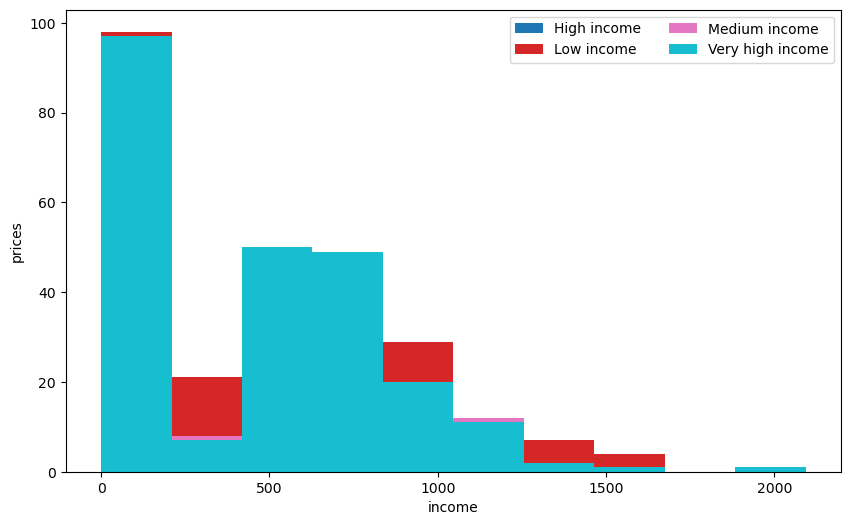

In [78]:
hist7=crosstab7.plot(kind='hist',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('income')
plt.ylabel('prices')
plt.show()

In [79]:
hist7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_income.png'))

#Answer: Very high income spends the most.  

In [80]:
##Using crosstab to compare income and age.

crosstab8=pd.crosstab(df_exclusion['age_flag'], df_exclusion['income_flag'],dropna = False)
crosstab8

income_flag,High income,Low income,Medium income,Very high income
age_flag,,,,
Middle aged,57100,47659,42213,60539
Senior citizen,36456,19362,11165,42734
Young Adult,10125,36707,50267,366


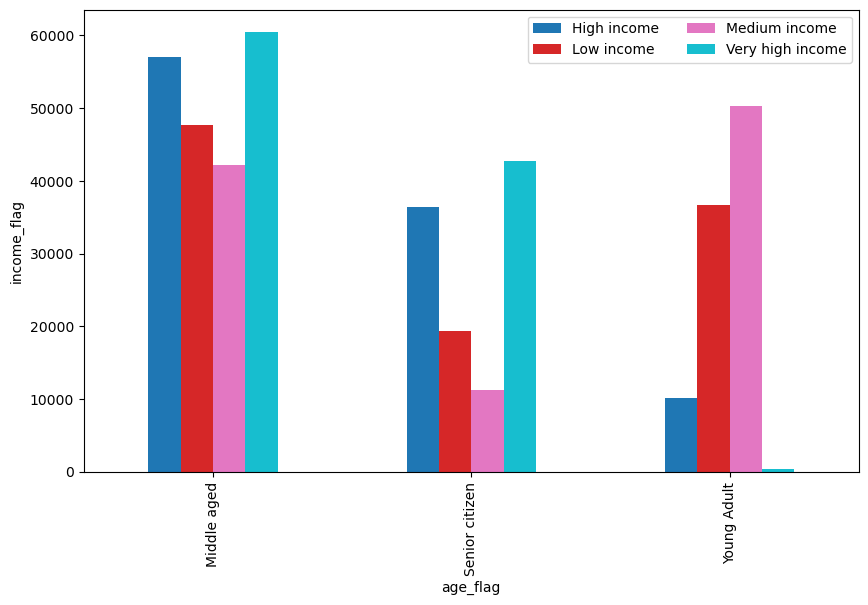

In [81]:
bar8=crosstab8.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('age_flag')
plt.ylabel('income_flag')
plt.show()

In [82]:
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

#Answer: Middge aged earn the higest across all income level. 

In [83]:
#Viewing fam_status and income. 

crosstab9=pd.crosstab(df_exclusion['fam_status'], df_exclusion['income_flag'],dropna = False)
crosstab9

income_flag,High income,Low income,Medium income,Very high income
fam_status,,,,
divorced/widowed,12559,6480,3849,14004
living with parents and siblings,2048,7495,10367,45
married,75370,70547,67411,77779
single,13704,19206,22018,11811


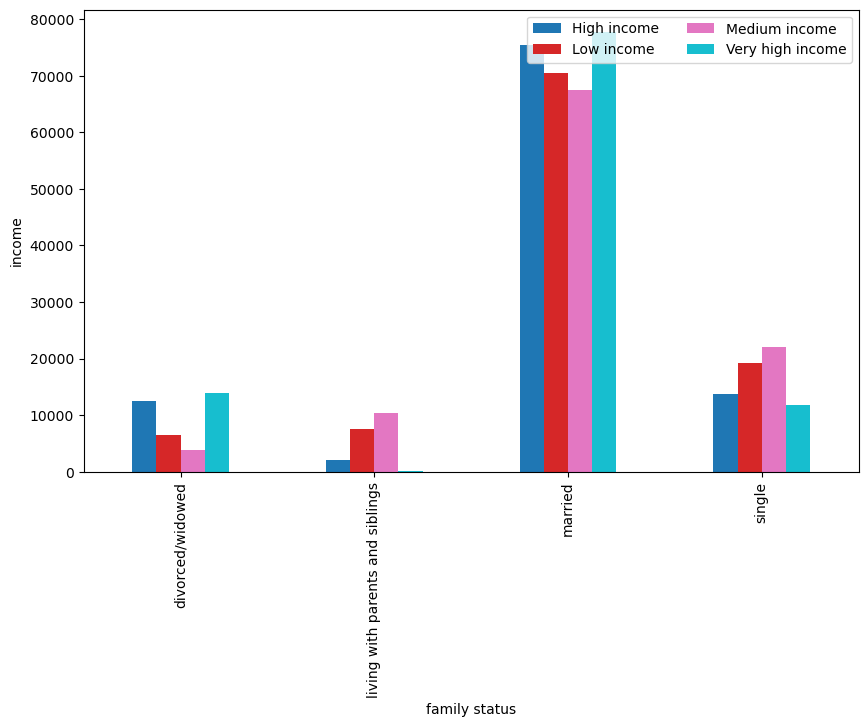

In [84]:
bar9=crosstab9.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('family status')
plt.ylabel('income')
plt.show()

In [85]:
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_familystatus.png'))

#Answer: Married household earn the highest income across all income bracket and therefore have the greatest purchasing power. 

In [86]:
#Using crosstab to view region and age

crosstab10=pd.crosstab(df_exclusion['region'], df_exclusion['age_flag'],dropna = False)
crosstab10

age_flag,Middle aged,Senior citizen,Young Adult
region,,,
Region1,38656,20722,17648
Region2,50618,25744,24075
Region3,63190,34319,29969
Region4,55047,28932,25773


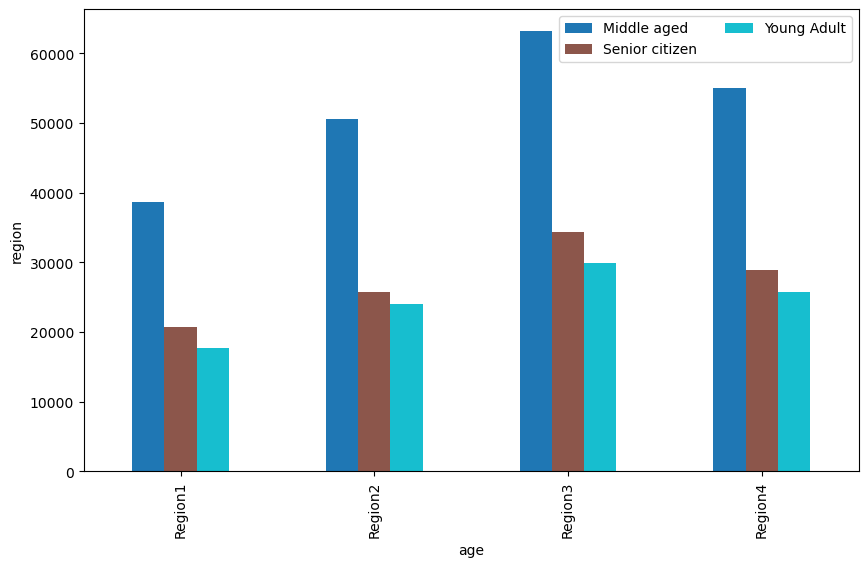

In [87]:
bar10=crosstab10.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('age')
plt.ylabel('region')
plt.show()

#Answer: Region 3 has the highes count of all ages.  

In [88]:
bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age.png'))

In [89]:
#Using crosstab to view region and family status.

crosstab11=pd.crosstab(df_exclusion['region'], df_exclusion['fam_status'],dropna = False)
crosstab11

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Region1,6720,3525,54441,12340
Region2,8722,4550,71188,15977
Region3,11907,6364,88806,20401
Region4,9543,5516,76672,18021


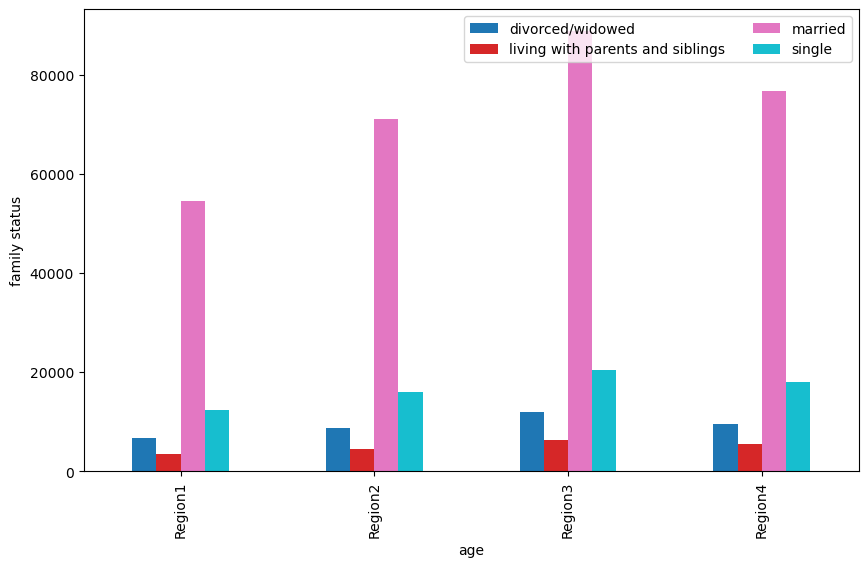

In [90]:
bar11=crosstab11.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('age')
plt.ylabel('family status')
plt.show()

Answer: Households with marital status have the highest count across all regions, however, region 3 has the highest due to its population size. 

In [91]:
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_stat_age.png'))

In [92]:
#Using crosstab to compare department_id and region to see which department has the highest sales according to region. 

crosstab12=pd.crosstab(df_exclusion['department_id'], df_exclusion['region'],dropna = False)
crosstab12

region,Region1,Region2,Region3,Region4
department_id,,,,
1.0,6138,7824,10083,8674
2.0,99,129,195,151
3.0,2820,3613,4514,3825
4.0,21728,28051,35289,30330
5.0,457,651,754,765
6.0,642,952,1180,1051
7.0,6049,7950,10487,8728
8.0,274,294,358,429
9.0,2361,3137,3892,3447


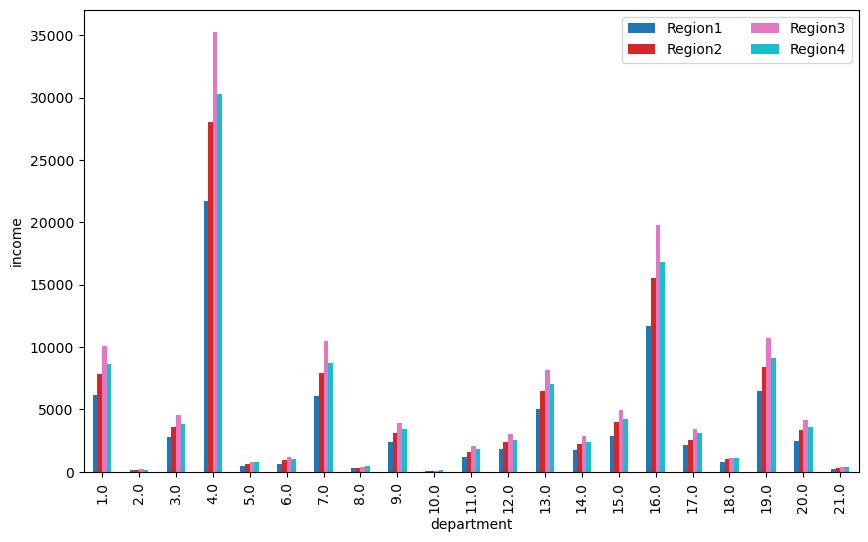

In [93]:
bar12=crosstab12.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('department')
plt.ylabel('income')
plt.show()

#Answer: Department 4 has the highest sales in Region 3, followed by department 16 in all regions. 

In [94]:
#Exporting chart

bar12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_income.png'))

In [95]:
#Using crosstab to compare region and prices. 

crosstab13=pd.crosstab(df_exclusion['price_range_loc'], df_exclusion['region'],dropna = False)
crosstab13

region,Region1,Region2,Region3,Region4
price_range_loc,,,,
High_range product,1037,1373,1755,1434
Low_range product,24003,31416,40097,34380
Mid_range product,51986,67648,85626,73938


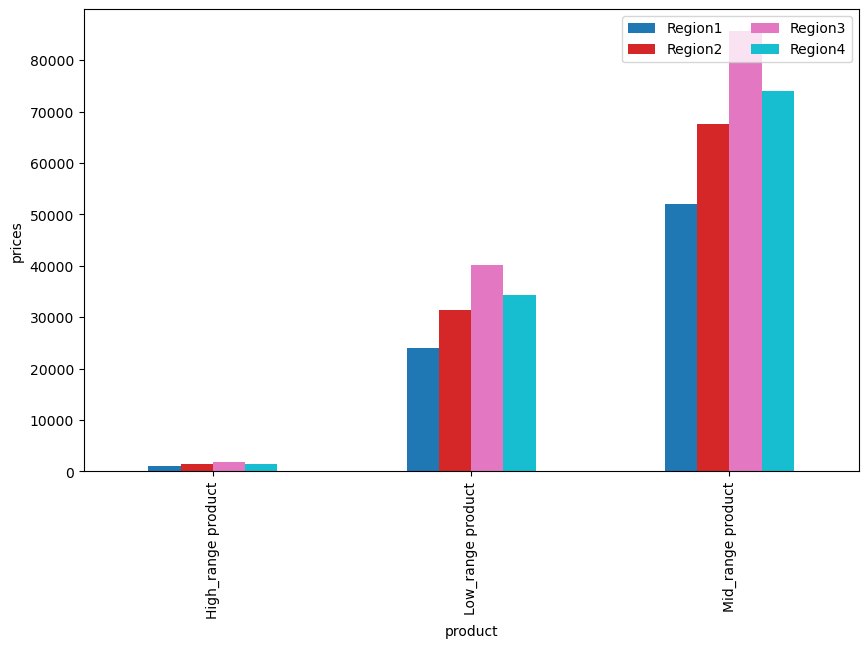

In [96]:
bar13=crosstab13.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('product')
plt.ylabel('prices')
plt.show()

#Answer:The volume of mid-range priced products have the greatest volume across regions.  

In [97]:
#Exporting chart

bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prod_prices.png'))

In [98]:
crosstab14=pd.crosstab(df_exclusion['income_flag'], df_exclusion['dependants_flag'],dropna = False)
crosstab14

dependants_flag,Have dependants,No dependants
income_flag,,
High income,77418,26263
Low income,78042,25686
Medium income,77778,25867
Very high income,77824,25815


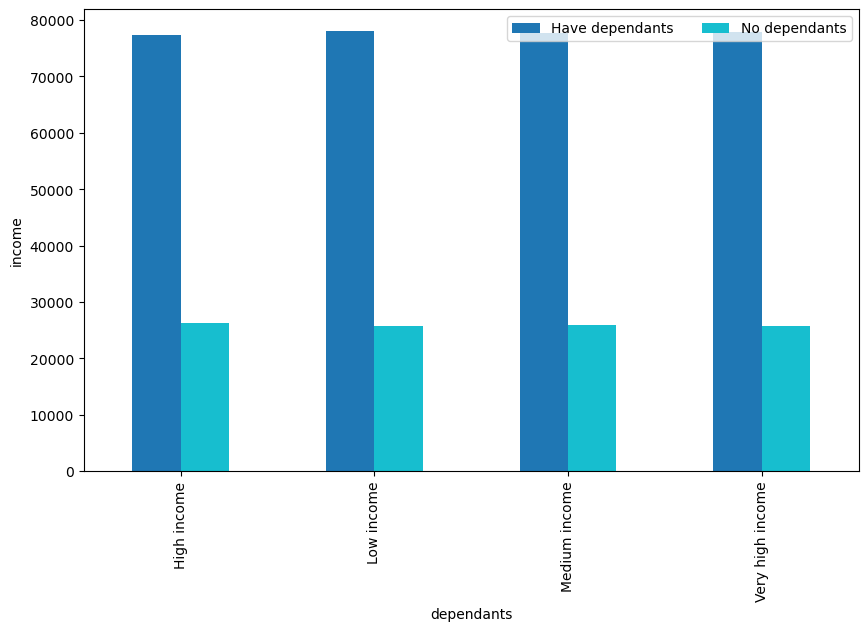

In [99]:
bar14=crosstab14.plot(kind='bar',
                   stacked=False,
                   colormap='tab10',
                   figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel('dependants')
plt.ylabel('income')
plt.show()

In [100]:
bar14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependat_income.png'))

In [102]:
#Exporting dataframe

df_combo_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','df_combo_final.pkl'))